### Week 13 HW:  
Neural Network on Cat vs Dog Kaggle Dataset

### 1. Download the Kaggle Cat-vs-Dog Dataset  
https://www.kaggle.com/c/dogs-vs-cats/data

In [1]:
!kaggle competitions download -c dogs-vs-cats

In [1]:
# imports
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

### 2. Use Preprocessing to turn the data into something the NN can work with.  Use either the ImageDataGenerator() or the keras.preprocessing.load_img() function builts into Keras.

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

OR

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/img_to_array
  
  
You want to scale the images such that they are a consistent size.  200x200 or 250x250 would be good choices.

To make the image a useful input for a NN, we want it to be a numpy array.

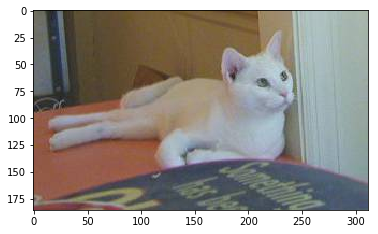

In [2]:
# Dispalaying a sample image
rand_img = random.choice([x for x in os.listdir("dogs-vs-cats/train/train")
                          if os.path.isfile(os.path.join("dogs-vs-cats/train/train", x))])
image_disp = load_img(os.path.join("dogs-vs-cats/train/train", rand_img))
plt.imshow(image_disp)

In [3]:
IMAGE_FOLDER_PATH="dogs-vs-cats/train/train"
FILE_NAMES=os.listdir(IMAGE_FOLDER_PATH)
WIDTH=250
HEIGHT=250

FAST_RUN = False
IMAGE_WIDTH=250
IMAGE_HEIGHT=250
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
targets=list()
full_paths=list()
for file_name in FILE_NAMES:
    target=file_name.split(".")[0]
    full_path=os.path.join(IMAGE_FOLDER_PATH, file_name)
    full_paths.append(full_path)
    targets.append(target)

dataset=pd.DataFrame()
dataset['image_path']=full_paths
dataset['target']=targets

In [5]:
dataset.tail()

,image_path,target
24995,dogs-vs-cats/train/train\dog.9995.jpg,dog
24996,dogs-vs-cats/train/train\dog.9996.jpg,dog
24997,dogs-vs-cats/train/train\dog.9997.jpg,dog
24998,dogs-vs-cats/train/train\dog.9998.jpg,dog
24999,dogs-vs-cats/train/train\dog.9999.jpg,dog


In [6]:
target_counts=dataset['target'].value_counts()
print("Number of dogs in the dataset:{}".format(target_counts['dog']))
print("Number of cats in the dataset:{}".format(target_counts['cat']))

Number of dogs in the dataset:12500
Number of cats in the dataset:12500


In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dogs-vs-cats/train',
        target_size=(250, 250),
        batch_size=50,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'dogs-vs-cats/test1',
        target_size=(250, 250),
        batch_size=50,
        class_mode='binary')

Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


### 3. Use the Tensorflow and Keras libraries from last week to build a NN.

*Use last week's class notes as an example.  Try using different activation functions  

Remember: start with a simple model and iterate.


In [8]:
nn_X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
nn_X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

NameError: name 'X_train' is not defined

In [ ]:
# create model
mdl_k = tf.keras.Sequential([tf.keras.layers.Input(shape=(nn_X_train.shape[1], nn_X_train.shape[2]))])
mdl_k.add(tf.keras.layers.Dense(12, input_dim=3, activation='softmax', kernel_initializer="he_normal"))
# mdl_k.add(tf.keras.layers.Dense(8, activation='relu'))

mdl_k.add(tf.keras.layers.LSTM(64))
#mdl_k.add(tf.keras.layers.LeakyReLU(alpha=0.2))
mdl_k.add(tf.keras.layers.Dense(1, activation='elu'))

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

# with tf.device('/GPU:0'):
model = tf.keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 248, 248, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
batch_normalization_v

In [11]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy", 
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["accuracy"])
print("[INFO]: model compiled...")

[INFO]: model compiled...


In [16]:
dataset_train, dataset_test=train_test_split(dataset,
                                                 test_size=0.2,
                                                 random_state=42)

In [17]:
train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1)

train_datagenerator=train_datagen.flow_from_dataframe(dataframe=dataset_train,
                                                     x_col="image_path",
                                                     y_col="target",
                                                     target_size=(WIDTH, HEIGHT),
                                                     class_mode="binary",
                                                     batch_size=150)

Found 20000 images belonging to 2 classes.


In [18]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_datagenerator=test_datagen.flow_from_dataframe(dataframe=dataset_test,
                                                   x_col="image_path",
                                                   y_col="target",
                                                   target_size=(WIDTH, HEIGHT),
                                                   class_mode="binary",
                                                   batch_size=150)

Found 5000 images belonging to 2 classes.


In [19]:
modelHistory=model.fit_generator(train_datagenerator,
                                epochs=50,
                                validation_data=test_datagenerator,
                                validation_steps=dataset_test.shape[0]//150,
                                steps_per_epoch=dataset_train.shape[0]//150
                                )

Instructions for updating:
Use tf.cast instead.
Epoch 1/50


ValueError: A target array with shape (150, 1) was passed for an output of shape (None, 2) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

In [ ]:
# Compile model
mdl_k.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [ ]:
mdl_k.summary()

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((nn_X_test, y_test)).batch(batch_size=128)

In [44]:
from tensorflow.python.keras.utils.vis_utils import plot_model

model = tf.keras.models.Sequential([
    
            #compressing down the 3D volume 
            #note that the depth is going with power of 2 
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2), 
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
            tf.keras.layers.MaxPooling2D(2,2),
    
            #flattening 
            tf.keras.layers.Flatten(),
    
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'), 
            # Only 1 output neuron.
            tf.keras.layers.Dense(1, activation='sigmoid') 
    
    ])

model.summary()

plot_model(model,  show_shapes=True, show_layer_names=True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 78400)            

In [47]:
# Compile model
mdl_k.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [49]:
mdl_k.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
history = mdl_k.fit(
#     nn_X_train,
#     y_train,
    train_generator,
    epochs=50,
    batch_size=128,
    # validation_data=(nn_X_test, y_test),
    validation_data=validation_generator,
    #validation_split=0.1,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min", verbose=2)
#     ],
    use_multiprocessing=True
)

Epoch 1/50


Exception in thread Thread-21:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\conda\conda\envs\tfnew\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\HP\AppData\Local\conda\conda\envs\tfnew\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\HP\AppData\Local\conda\conda\envs\tfnew\lib\site-packages\tensorflow\python\keras\utils\data_utils.py", line 843, in _run
    with closing(self.executor_fn(_SHARED_SEQUENCES)) as executor:
  File "C:\Users\HP\AppData\Local\conda\conda\envs\tfnew\lib\site-packages\tensorflow\python\keras\utils\data_utils.py", line 820, in pool_fn
    pool = get_pool_class(True)(
  File "C:\Users\HP\AppData\Local\conda\conda\envs\tfnew\lib\multiprocessing\context.py", line 119, in Pool
    return Pool(processes, initializer, initargs, maxtasksperchild,
  File "C:\Users\HP\AppData\Local\conda\conda\envs\tfnew\lib\multiprocessing\pool.py", line 212, in __init__
    self

#### 4. Chart your training/validation loss as well as your training/validation accuracy

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()